In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer


from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
emp_data=pd.read_csv("DS_C12_S3_Clustering_AbsenteeismAtWork_Data.csv",sep=";")
emp_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
emp_data.shape

(740, 21)

In [4]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
emp_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [6]:
emp_data.duplicated().sum()

34

In [7]:
emp_data.drop_duplicates(keep="first",inplace=True)
emp_data.reset_index(drop=True,inplace=True)
emp_data.drop("ID",axis=1,inplace=True)
emp_data=emp_data[emp_data["Month of absence"]!=0]

In [8]:
emp_data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,18.963016,6.438122,3.889047,2.551920,223.177809,29.288762,12.490754,36.446657,272.093701,94.546230,0.056899,1.293030,1.059744,0.564723,0.076814,0.756757,78.951636,172.204836,26.615932,7.173542
std,8.410501,3.386133,1.425923,1.122075,67.299124,14.713231,4.378738,6.545670,39.542963,3.811859,0.231814,0.672661,1.106502,0.496146,0.266485,1.307117,12.845252,6.170939,4.242691,13.629135
min,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.604000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,171.000000,25.000000,3.000000
75%,26.000000,10.000000,5.000000,4.000000,260.000000,49.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
emp_data.nunique()

Reason for absence                 28
Month of absence                   12
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    24
Service time                       18
Age                                21
Work load Average/day              37
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    16
Absenteeism time in hours          19
dtype: int64

In [10]:
cat_col=[]
cont_col=[]
for col in emp_data:
    if col=="Month of absence":
        cat_col.append(col)
    elif emp_data[col].nunique()<10:
        cat_col.append(col)
    else:
        cont_col.append(col)

In [11]:
print("categorical columns :",cat_col)
print("continuous columns :",cont_col)

categorical columns : ['Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
continuous columns : ['Reason for absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


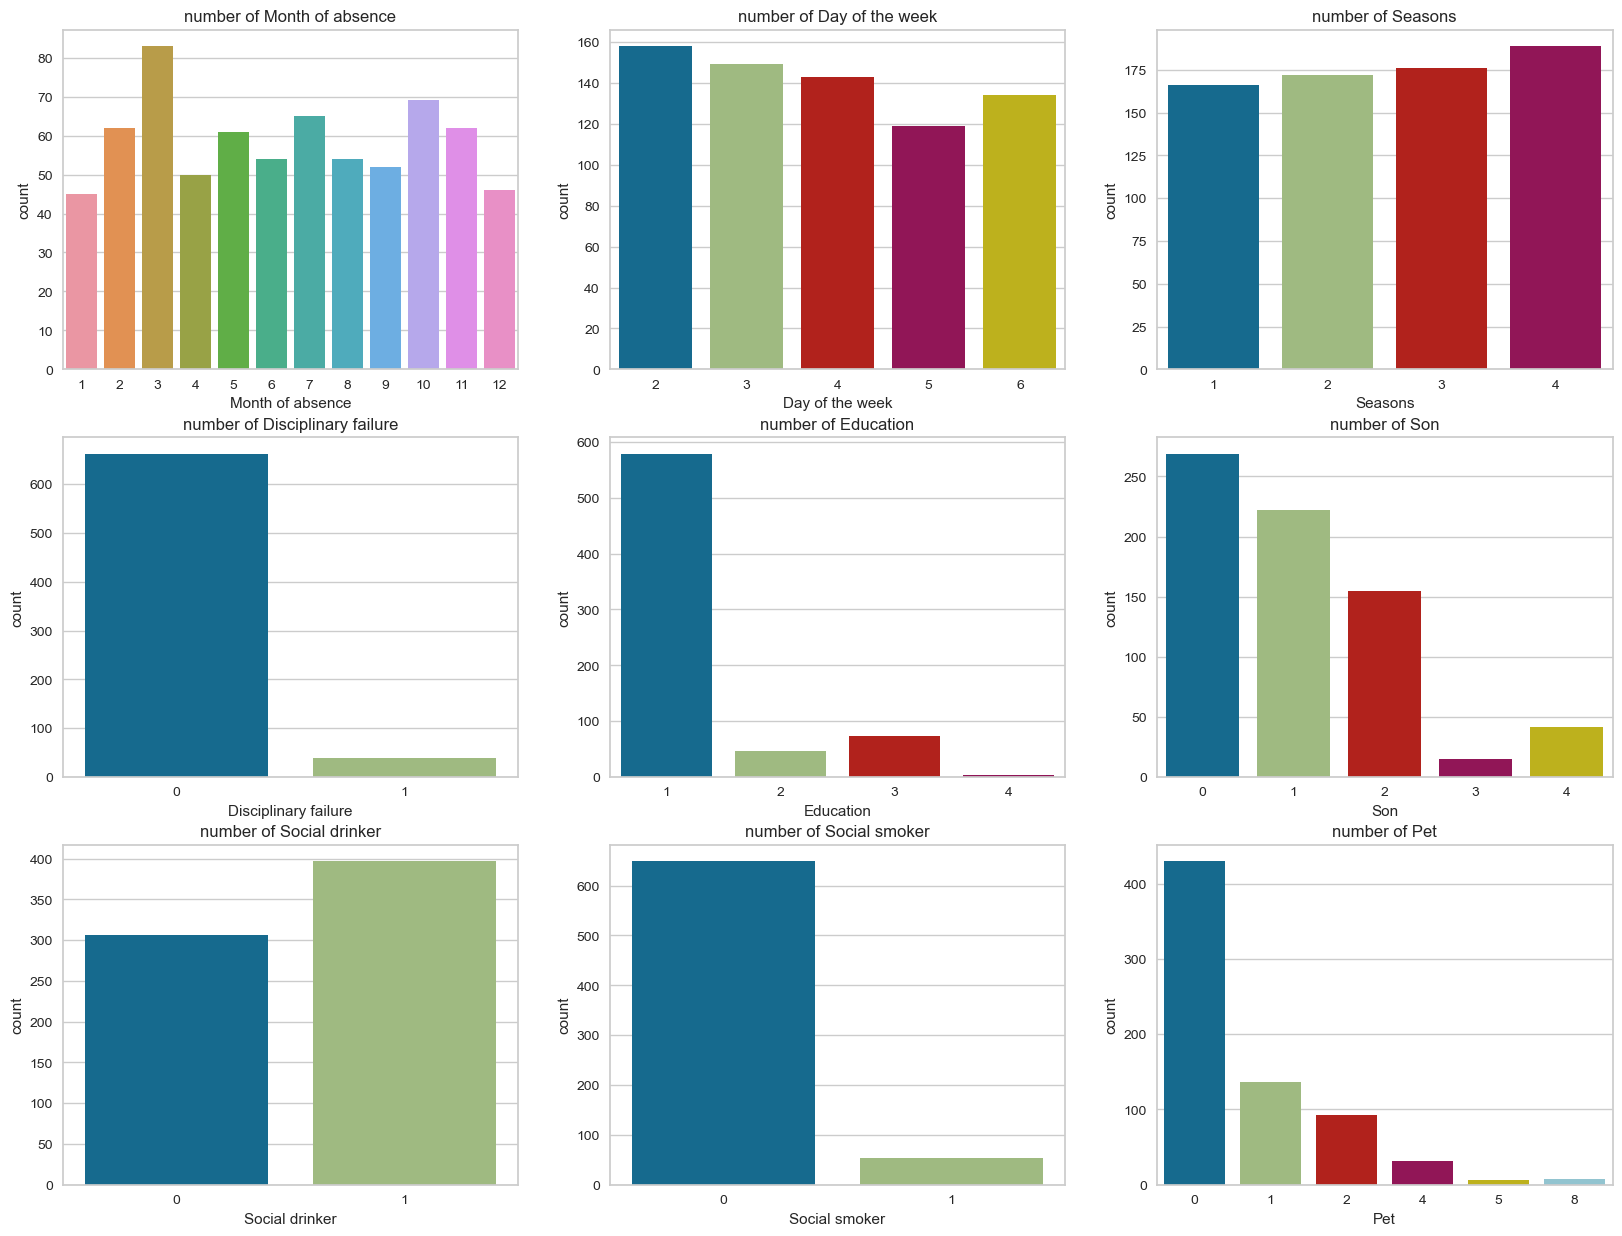

In [12]:
fig,axs=plt.subplots(3,3,figsize=(20,15))
axs=axs.ravel()
j=0
for i in cat_col:
    sns.countplot(i,data=emp_data,ax=axs[j])
    axs[j].set_title(f"number of {i}")
    j+=1
plt.show()

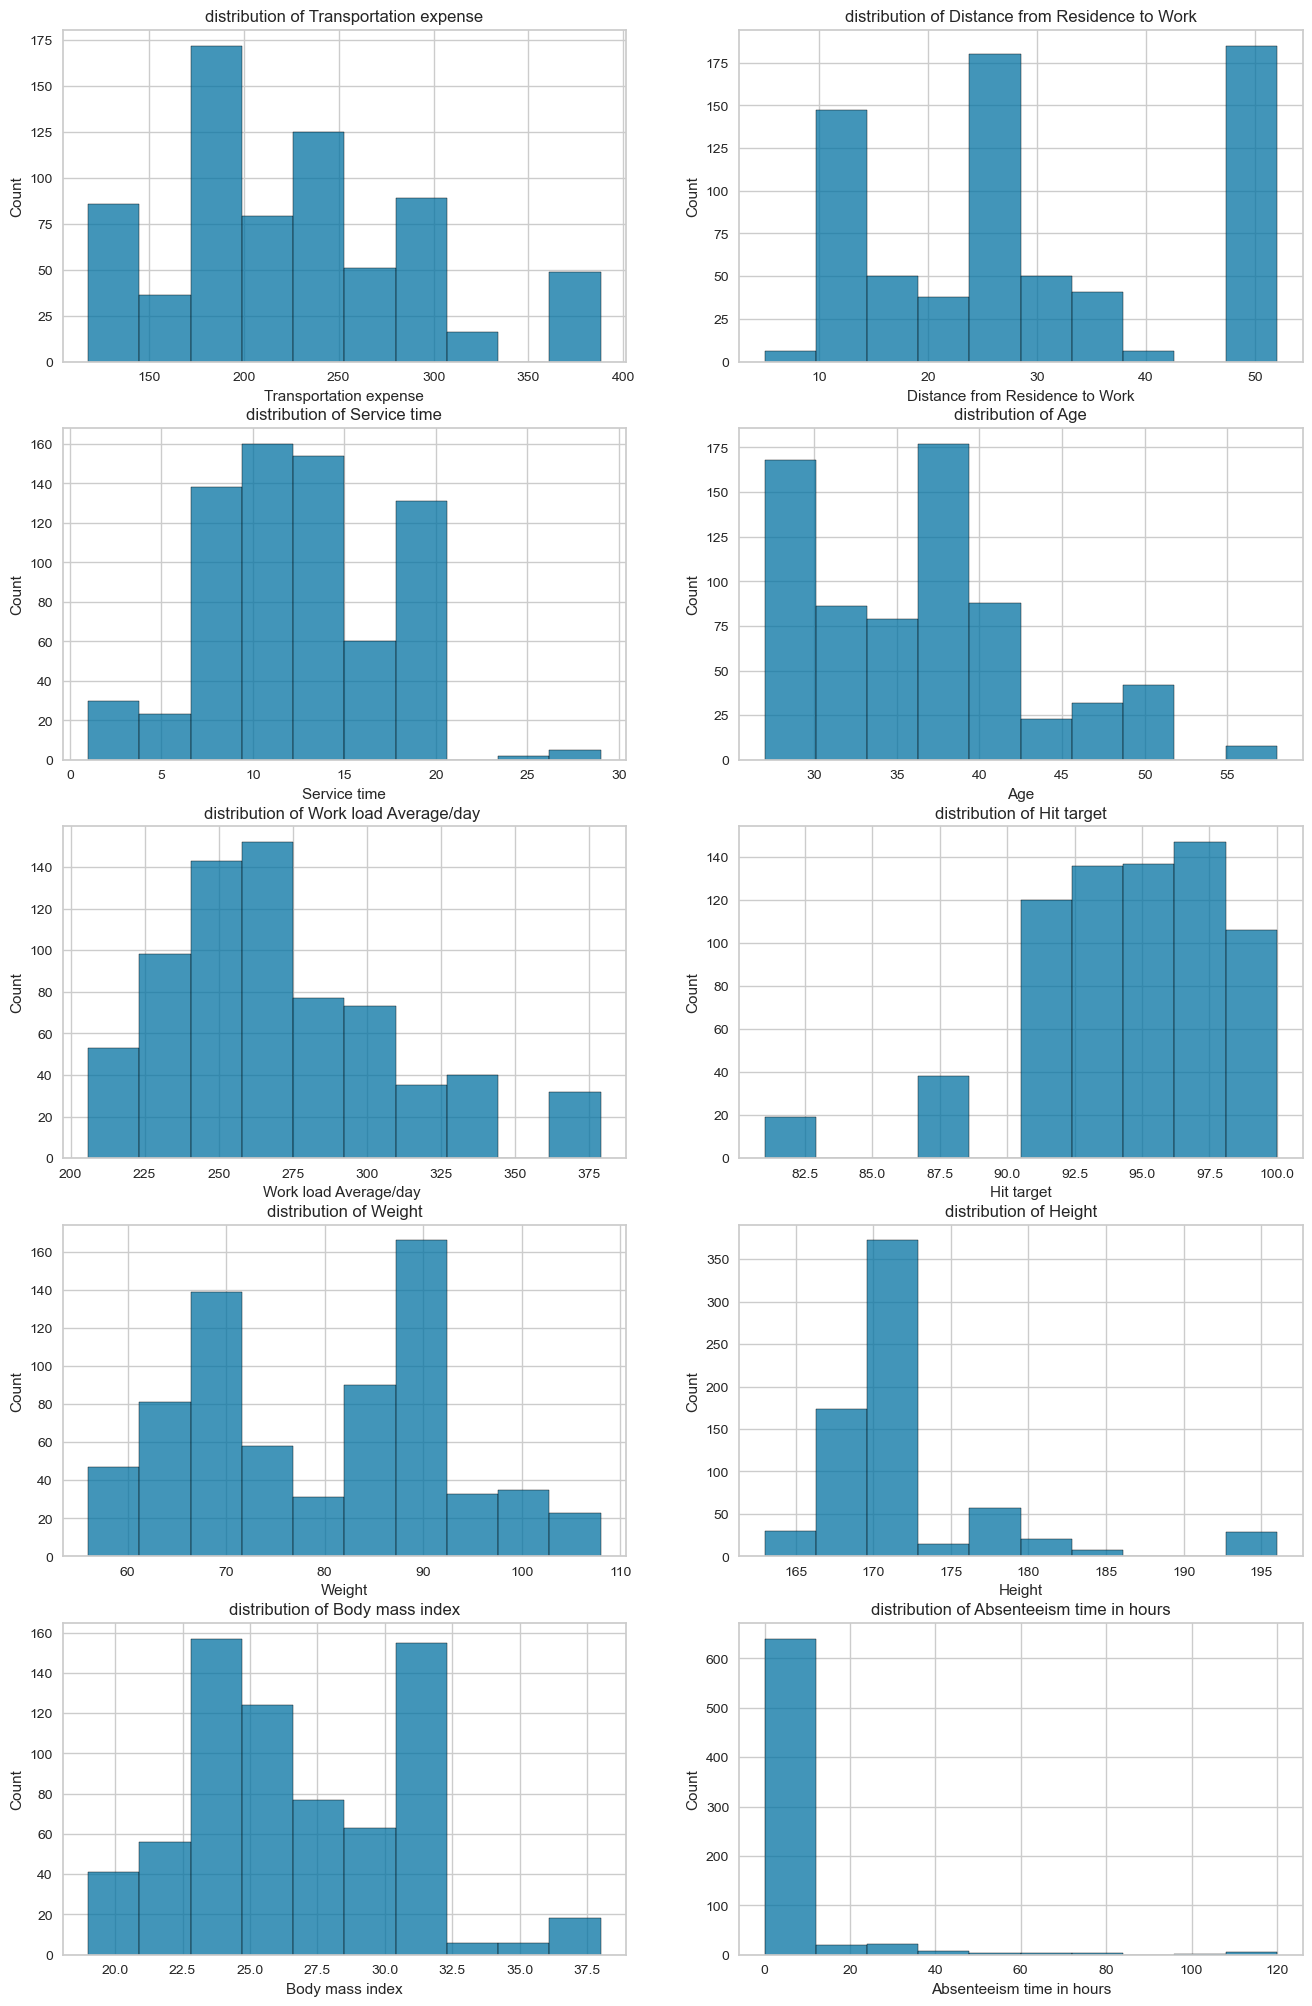

In [13]:
fig,axs=plt.subplots(5,2,figsize=(16,25))
axs=axs.ravel()
j=0
for i in cont_col[1:]:
    sns.histplot(x=i,bins=10,data=emp_data,ax=axs[j])
    axs[j].set_title(f"distribution of {i}")
    j+=1
plt.show()

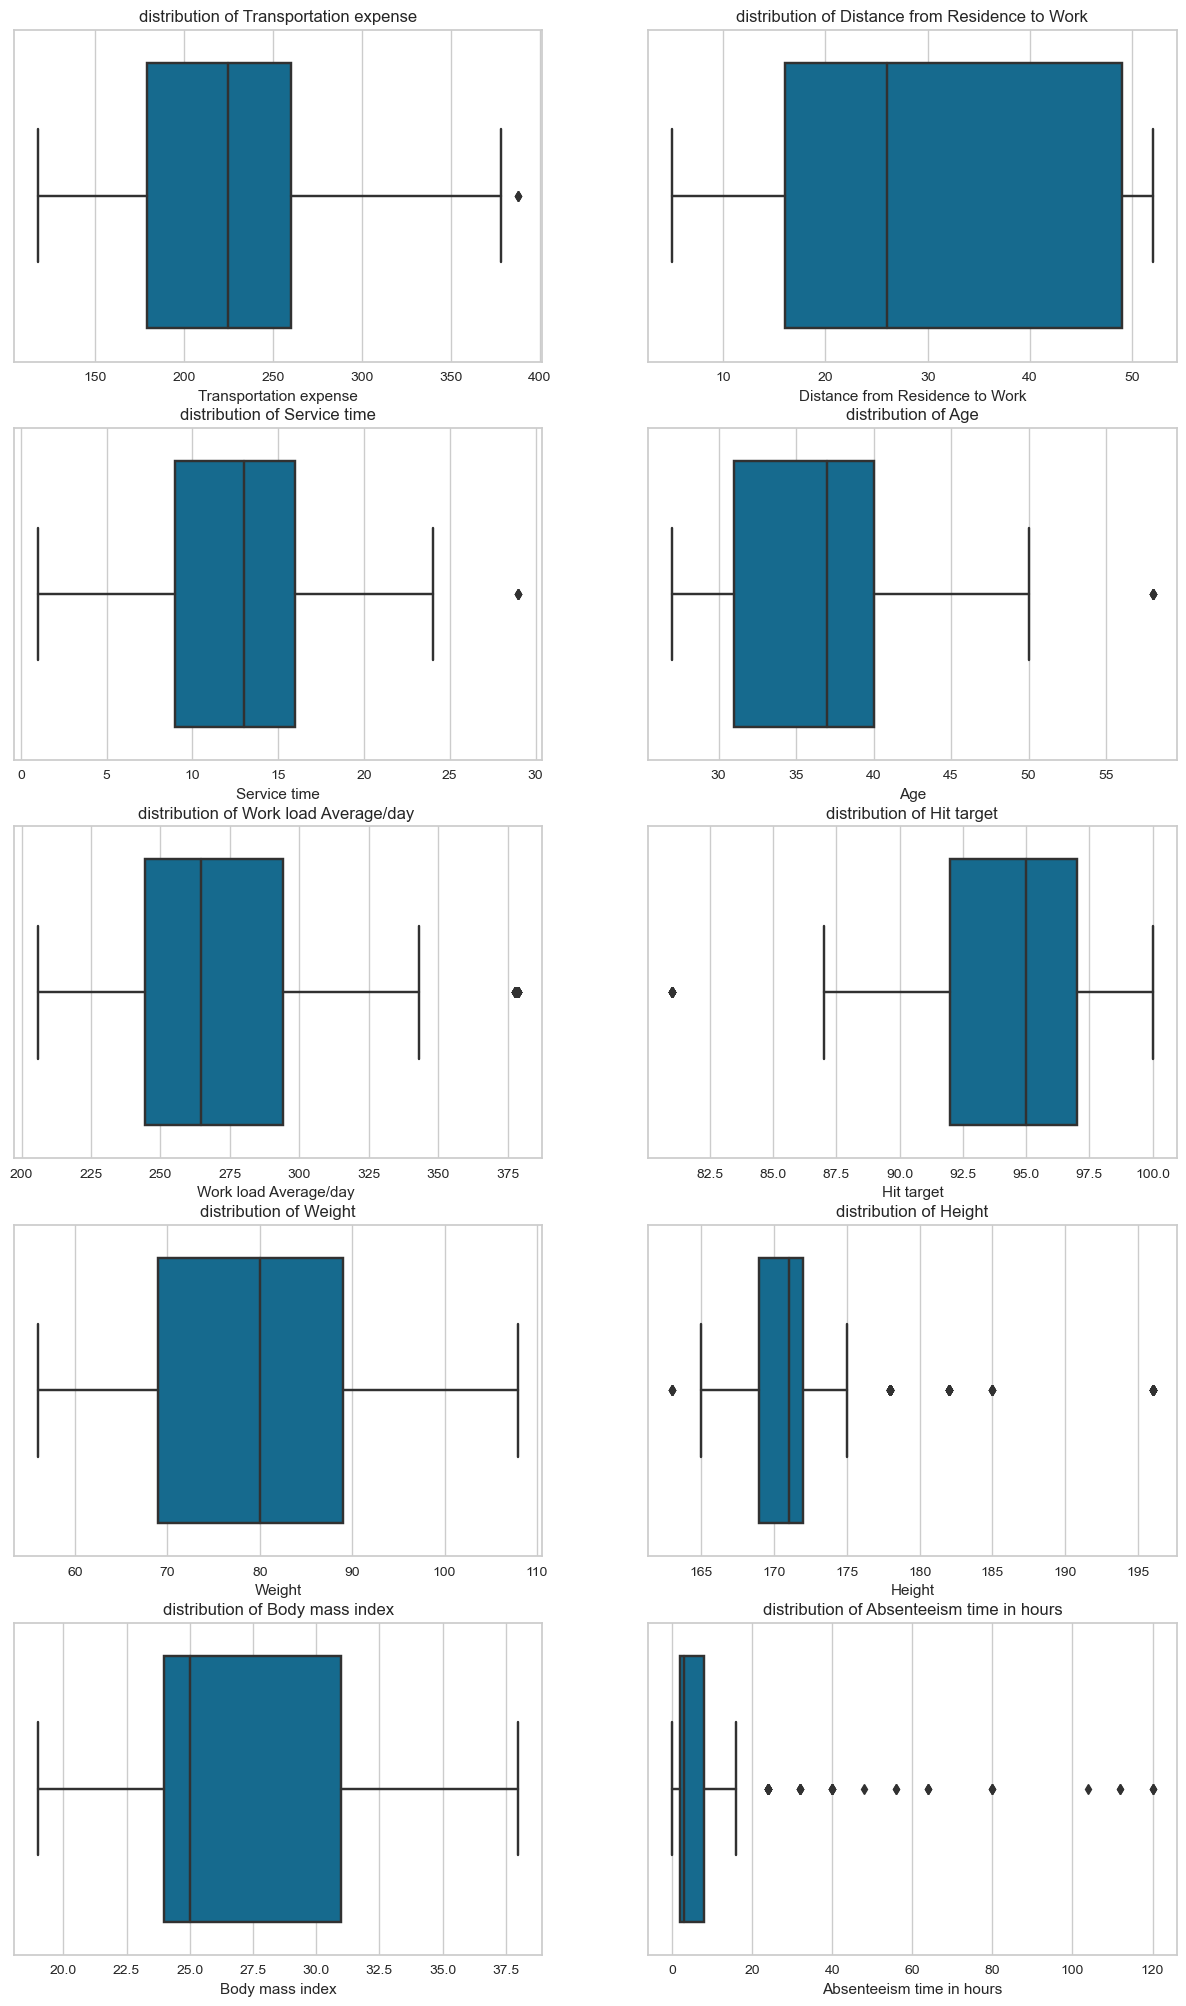

In [14]:
fig,axs=plt.subplots(5,2,figsize=(15,25))
axs=axs.ravel()
j=0
for i in cont_col[1:]:
    sns.boxplot(i,data=emp_data,ax=axs[j])
    axs[j].set_title(f"distribution of {i}")
    j+=1
plt.show()

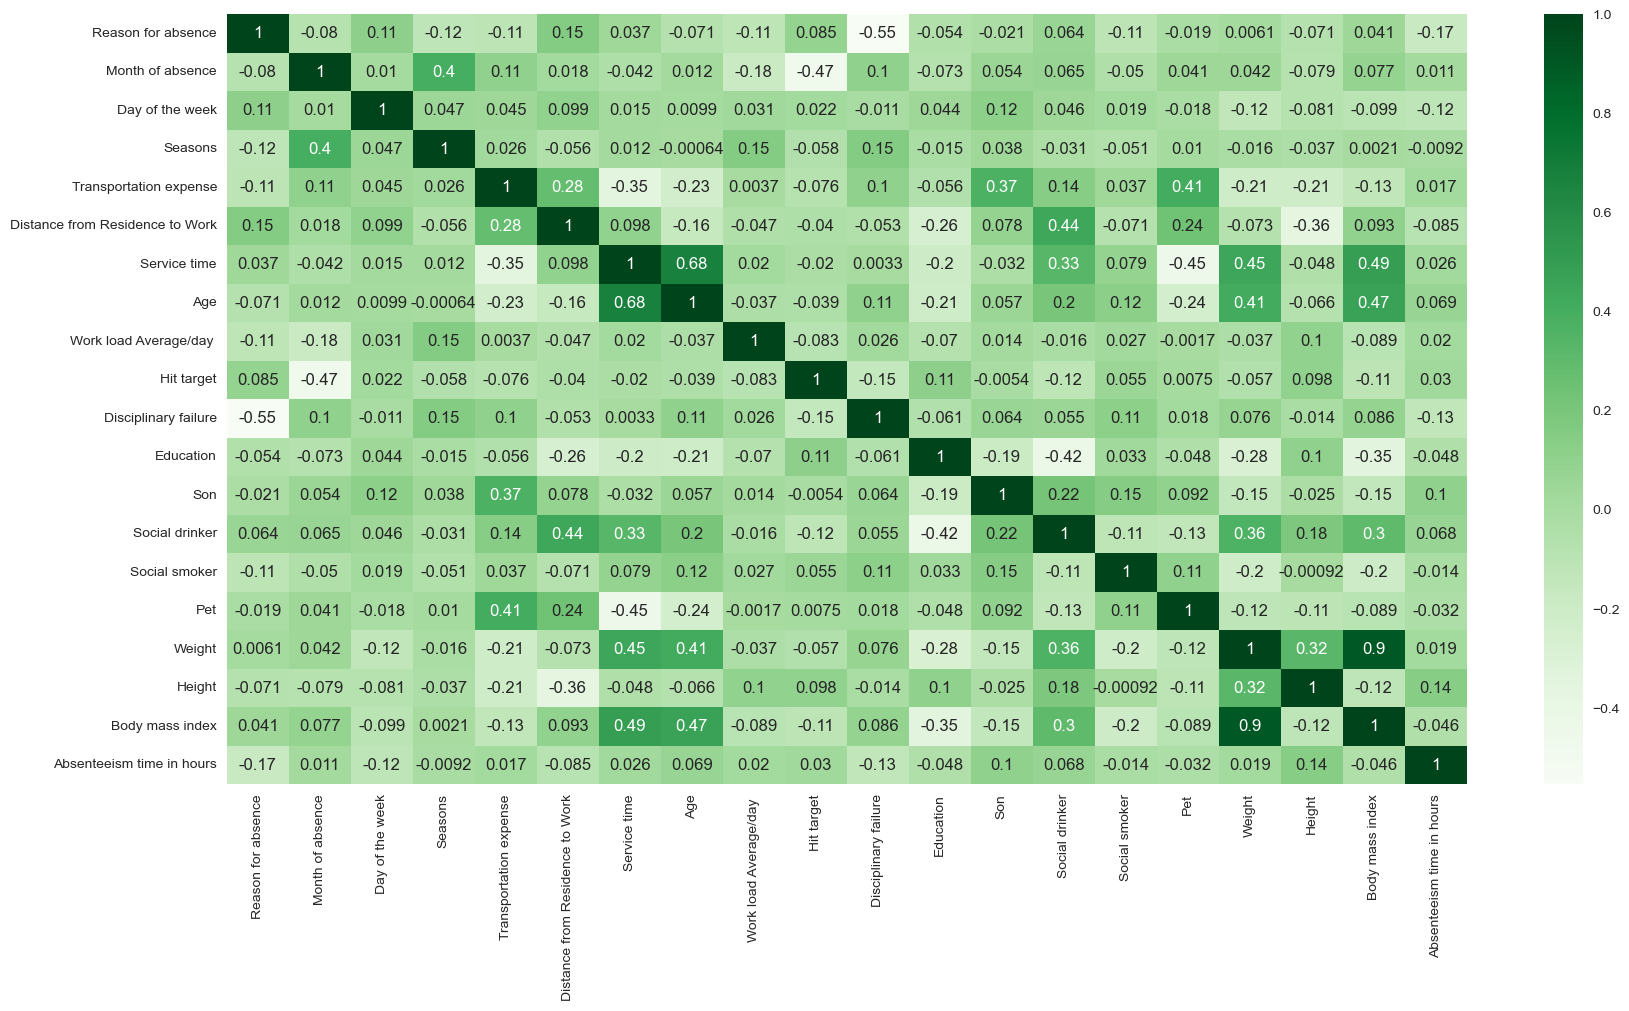

In [15]:
cm=emp_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True,cmap="Greens")
plt.show()

In [16]:
emp_data.drop(["Body mass index","Seasons"],axis=1,inplace=True)

In [17]:
cat_col=[]
cont_col=[]
for col in emp_data:
    if col=="Month of absence":
        cat_col.append(col)
    elif emp_data[col].nunique()<10:
        cat_col.append(col)
    else:
        cont_col.append(col)

In [18]:
scaled_data=StandardScaler().fit_transform(emp_data)
scaled_data=pd.DataFrame(normalize(scaled_data),columns=emp_data.columns)
scaled_data

,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,0.332873,0.066016,-0.248052,0.389113,0.181471,0.046269,-0.209487,-0.327384,0.256100,-0.097651,-0.173312,0.338071,0.349036,-0.114678,0.074035,0.342191,-0.013206,-0.092638
1,-0.368582,0.027126,-0.101924,-0.255484,-0.180979,0.205680,0.338486,-0.134522,0.105232,0.665069,-0.071214,-0.008827,0.143419,-0.047121,-0.094643,0.242417,0.153519,-0.086043
2,0.161419,0.055803,0.026168,-0.220757,0.496246,0.423120,0.079806,-0.276736,0.216480,-0.082544,-0.146500,-0.322084,0.295037,-0.096936,-0.194698,0.263071,-0.120156,-0.127656
3,-0.298167,0.034784,0.163320,0.173875,-0.346049,0.072252,0.081770,-0.172498,0.134939,-0.051452,-0.091318,0.178129,0.183906,0.726201,-0.121362,-0.178721,-0.142836,-0.048811
4,0.193451,0.066877,0.314005,0.394184,0.183836,0.046872,-0.212217,-0.331651,0.259438,-0.098924,-0.175571,0.342476,0.353584,-0.116172,0.075000,0.346651,-0.013378,-0.152988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,0.079602,0.036580,0.017153,0.451452,0.340279,-0.477808,-0.284468,-0.041754,-0.089421,-0.054109,-0.096032,-0.011903,0.193401,-0.063543,0.546975,0.017992,-0.007317,0.013368
699,0.145897,0.067044,0.031439,0.010940,-0.090313,-0.322103,-0.521381,-0.076528,-0.163894,-0.099172,-0.176011,-0.021816,-0.459886,-0.116464,0.384296,-0.313023,-0.209836,0.024501
700,-0.108879,0.025482,-0.203444,0.332746,-0.128262,-0.017211,-0.127783,-0.029087,-0.062293,-0.037693,-0.066898,0.269281,0.134727,-0.044265,-0.088908,-0.107018,-0.079754,0.820577
701,-0.263258,0.074028,-0.278154,0.436335,0.203494,0.051884,-0.234910,-0.084499,-0.180965,-0.109502,-0.194345,0.379098,0.391393,-0.128595,0.083020,0.383718,-0.014809,0.027053


##  Dimensionality reduction using PCA

In [19]:
pca=PCA().fit(scaled_data)
features=range(pca.n_components_)

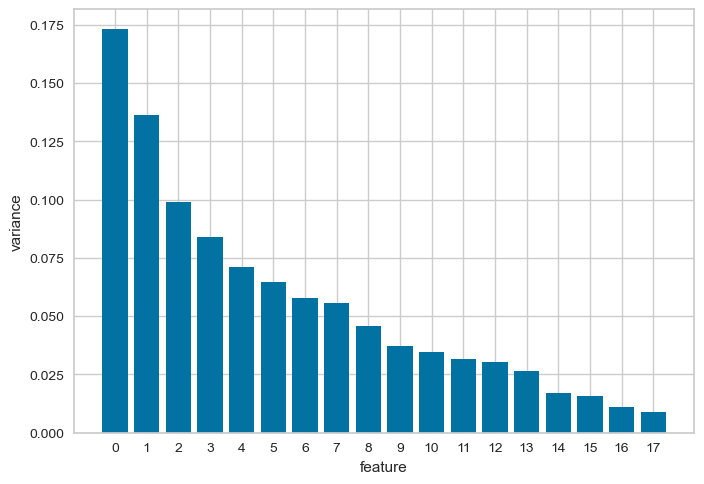

In [20]:
plt.bar(features,pca.explained_variance_ratio_)
plt.xlabel("feature")
plt.ylabel("variance")
plt.xticks(features)
plt.show()

In [21]:
pca_transformed=PCA(n_components=2,random_state=42).fit_transform(scaled_data)
pca_transformed

array([[-0.33115618, -0.4941703 ],
       [-0.3842224 ,  0.3864917 ],
       [-0.72981516,  0.11637119],
       ...,
       [ 0.05103669, -0.31115967],
       [-0.32147381, -0.59547866],
       [ 0.35288168,  0.43073078]])

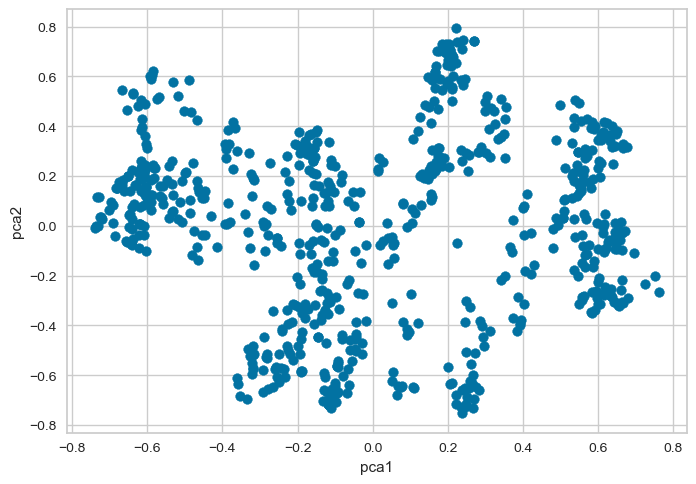

In [22]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1])
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

## --------------------------------------------------Model Creation ------------------------------------------------------------

## K_Means

In [23]:
distortion=[]
for k in range(2,10):
    model=KMeans(n_clusters=k,random_state=42).fit(pca_transformed)
    distortion.append(model.inertia_)

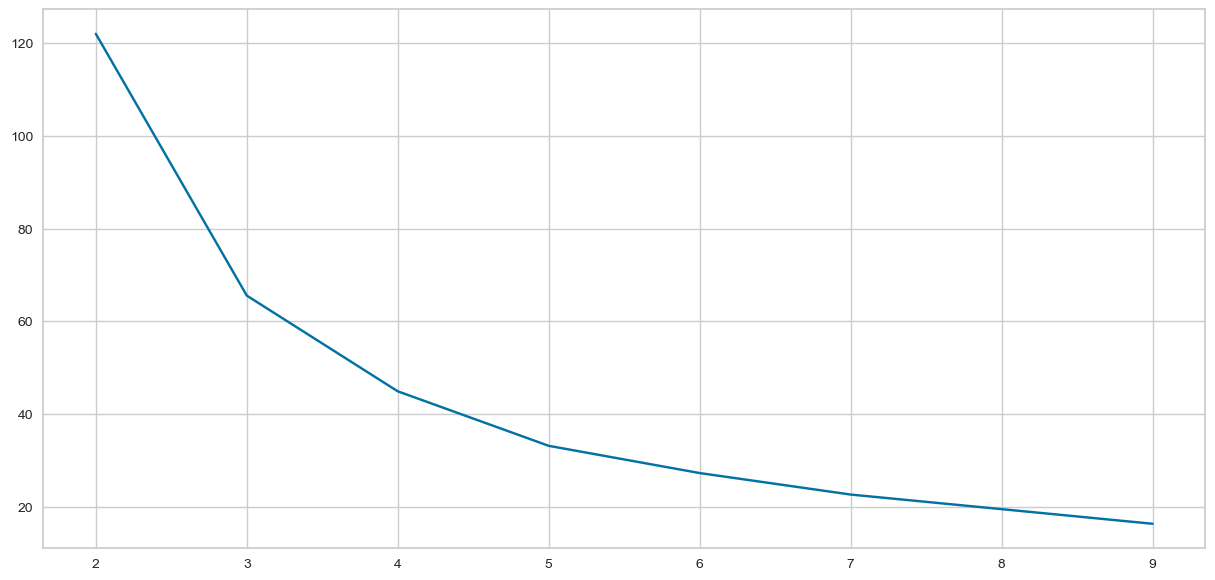

In [24]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.plot(range(2,10),distortion)
plt.show()

In [25]:
k_model=KMeans(n_clusters=3,random_state=42).fit(pca_transformed)
k_labels=k_model.labels_

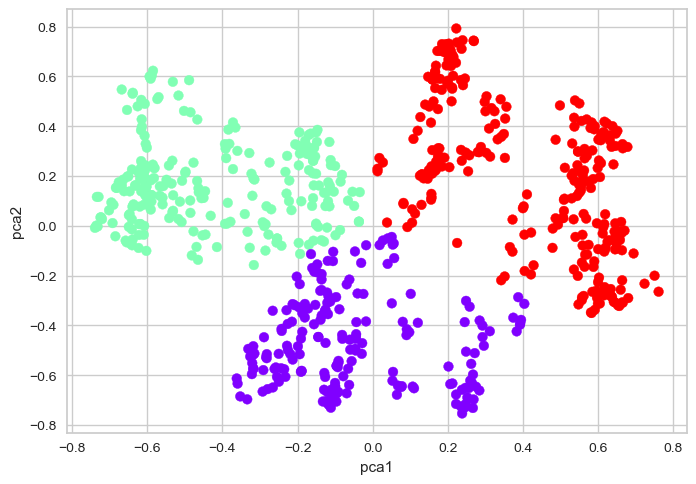

In [26]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],c=k_labels,cmap="rainbow")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

In [27]:
for k in range(2,10):
    km_model=KMeans(n_clusters=k,random_state=42).fit(pca_transformed)
    km_labels=km_model.predict(pca_transformed)
    score=silhouette_score(pca_transformed,km_model.labels_,metric="euclidean")
    print(f"for k {k} score: {score}")

for k 2 score: 0.4181659357982688
for k 3 score: 0.4859179192626986
for k 4 score: 0.48447577346670984
for k 5 score: 0.47107314575255604
for k 6 score: 0.4779511756291921
for k 7 score: 0.4729232565082495
for k 8 score: 0.4649902492338586
for k 9 score: 0.4644175198630205


## Agglomerative hierarchical

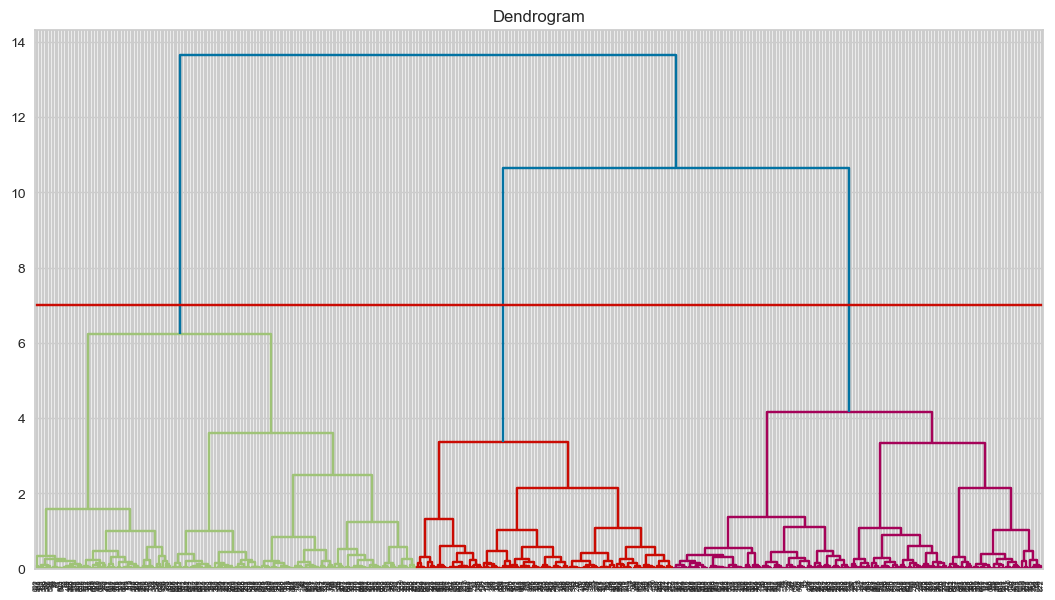

In [28]:
linkage_data=linkage(pca_transformed,method="ward",metric='euclidean')
plt.figure(figsize=(13,7))
dendrogram(linkage_data)
plt.axhline(y=7,c="r")
plt.title("Dendrogram")
plt.show()

In [29]:
hier_model=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward").fit(pca_transformed)
hr_labels=hier_model.labels_

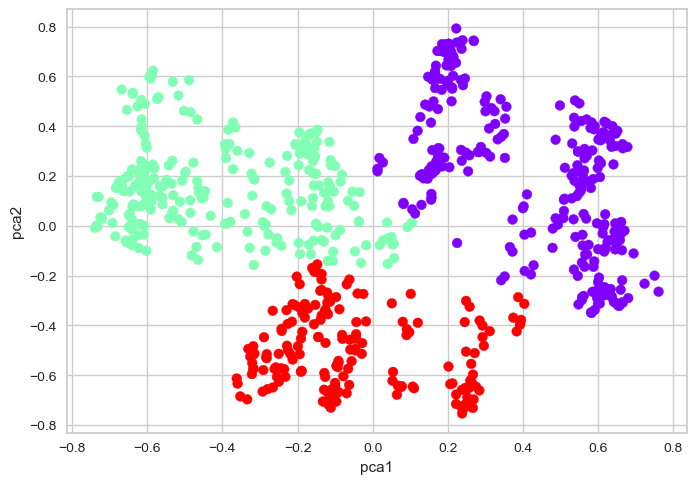

In [30]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],c=hr_labels,cmap="rainbow")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

In [31]:
for k in range(2,10):
    hier_model=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="ward").fit(pca_transformed)
    h_labels=hier_model.labels_
    score=silhouette_score(pca_transformed,h_labels,metric="euclidean")
    print(f"for k {k} score: {score}")

for k 2 score: 0.41413026380597245
for k 3 score: 0.47918901354285587
for k 4 score: 0.46894422632431476
for k 5 score: 0.430638361308228
for k 6 score: 0.4471319612978086
for k 7 score: 0.43895314352229725
for k 8 score: 0.4418784521508624
for k 9 score: 0.4590604754342754


## DBSCAN

In [32]:
neigh_fit=NearestNeighbors(n_neighbors=5).fit(pca_transformed)
distance,index=neigh_fit.kneighbors(pca_transformed)

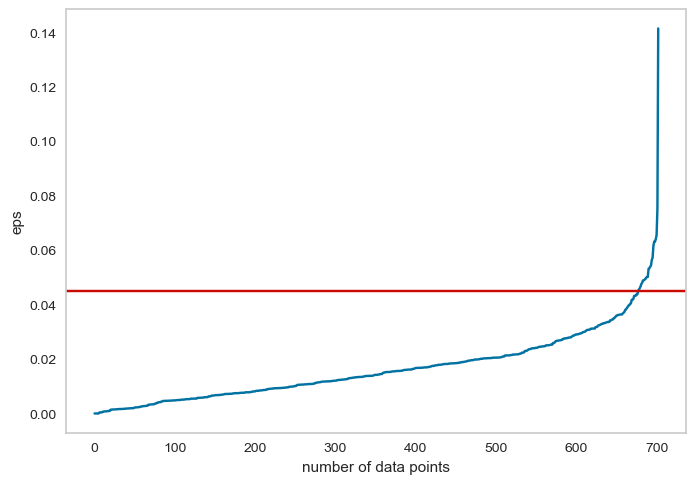

In [33]:
sorted_distance=np.sort(distance,axis=0)
plt.plot(sorted_distance[:,1])
plt.axhline(y=0.045,c="r")
plt.xlabel("number of data points")
plt.ylabel("eps")
plt.grid()
plt.show()

In [34]:
eps=0.045
for i in range(3,17):
    db_model=DBSCAN(eps=eps,min_samples=i).fit(pca_transformed)
    db_labels=db_model.labels_+1
    
    y=np.bincount(db_labels)
    z=np.nonzero(y)[0]
    clusters=list(zip(z,y[z]))
    score=silhouette_score(pca_transformed,db_labels,metric="euclidean")
    print("min_sample:",i," clusters:",clusters,"score:" ,round(score,4))
    print()

min_sample: 3  clusters: [(0, 61), (1, 84), (2, 3), (3, 12), (4, 8), (5, 94), (6, 28), (7, 41), (8, 49), (9, 10), (10, 10), (11, 3), (12, 80), (13, 10), (14, 32), (15, 40), (16, 30), (17, 6), (18, 5), (19, 3), (20, 6), (21, 26), (22, 3), (23, 3), (24, 9), (25, 3), (26, 3), (27, 3), (28, 4), (29, 3), (30, 4), (31, 3), (32, 8), (33, 4), (34, 5), (35, 4), (36, 3)] score: 0.1055

min_sample: 4  clusters: [(0, 111), (1, 32), (2, 7), (3, 94), (4, 20), (5, 41), (6, 30), (7, 8), (8, 51), (9, 80), (10, 32), (11, 40), (12, 12), (13, 30), (14, 6), (15, 9), (16, 18), (17, 26), (18, 9), (19, 9), (20, 4), (21, 5), (22, 4), (23, 5), (24, 8), (25, 5), (26, 4), (27, 3)] score: 0.2018

min_sample: 5  clusters: [(0, 144), (1, 32), (2, 7), (3, 87), (4, 19), (5, 41), (6, 27), (7, 13), (8, 42), (9, 32), (10, 40), (11, 12), (12, 36), (13, 30), (14, 6), (15, 18), (16, 38), (17, 26), (18, 6), (19, 7), (20, 8), (21, 8), (22, 5), (23, 8), (24, 6), (25, 5)] score: 0.1941

min_sample: 6  clusters: [(0, 176), (1, 7

In [35]:
db=DBSCAN(eps=eps,min_samples=4)
db.fit(pca_transformed)
db_labels=db.labels_+1

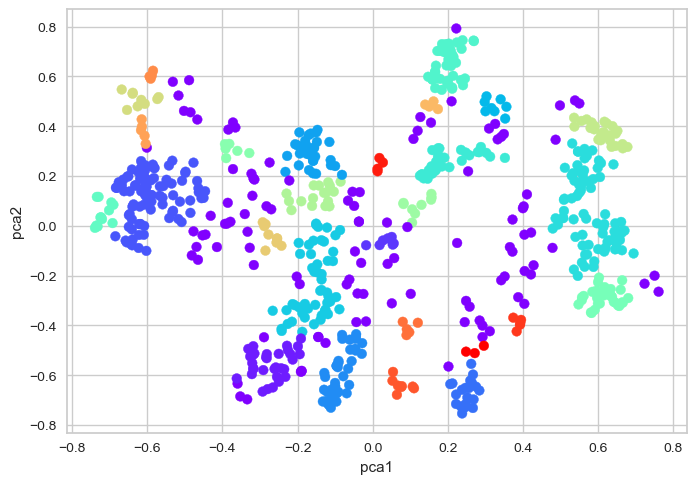

In [36]:
plt.scatter(pca_transformed[:,0],pca_transformed[:,1],c=db_labels,cmap="rainbow")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

In [37]:
for k in range(2,10):
    db_model=DBSCAN(eps=eps,min_samples=k).fit(pca_transformed)
    d_labels=db_model.labels_+1
    score=silhouette_score(pca_transformed,d_labels,metric="euclidean")
    print(f"for k {k} score: {score}")

for k 2 score: 0.11590773115756045
for k 3 score: 0.10548678966649928
for k 4 score: 0.20179263664840288
for k 5 score: 0.1940873061975355
for k 6 score: 0.15649151881138973
for k 7 score: 0.11587677624016691
for k 8 score: 0.05119900939361088
for k 9 score: -0.022060437611790912


# Best Model : KMeans clustering.

# -------------------------------------------------------------------------------------------------------------

In [38]:
emp_data["clusters"]=hr_labels
emp_data

,Reason for absence,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours,clusters
0,26,7,3,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,4,2
1,0,7,3,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,0,1
2,23,7,4,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,2,1
3,7,7,5,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,4,1
4,23,7,5,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,22,7,4,361,52,3,28,264.604,93,0,1,1,1,0,4,80,172,8,2
699,22,7,4,225,26,9,28,264.604,93,0,1,1,0,0,2,69,169,8,0
700,13,7,2,369,17,12,31,264.604,93,0,1,3,1,0,0,70,169,80,2
701,14,7,3,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,8,2


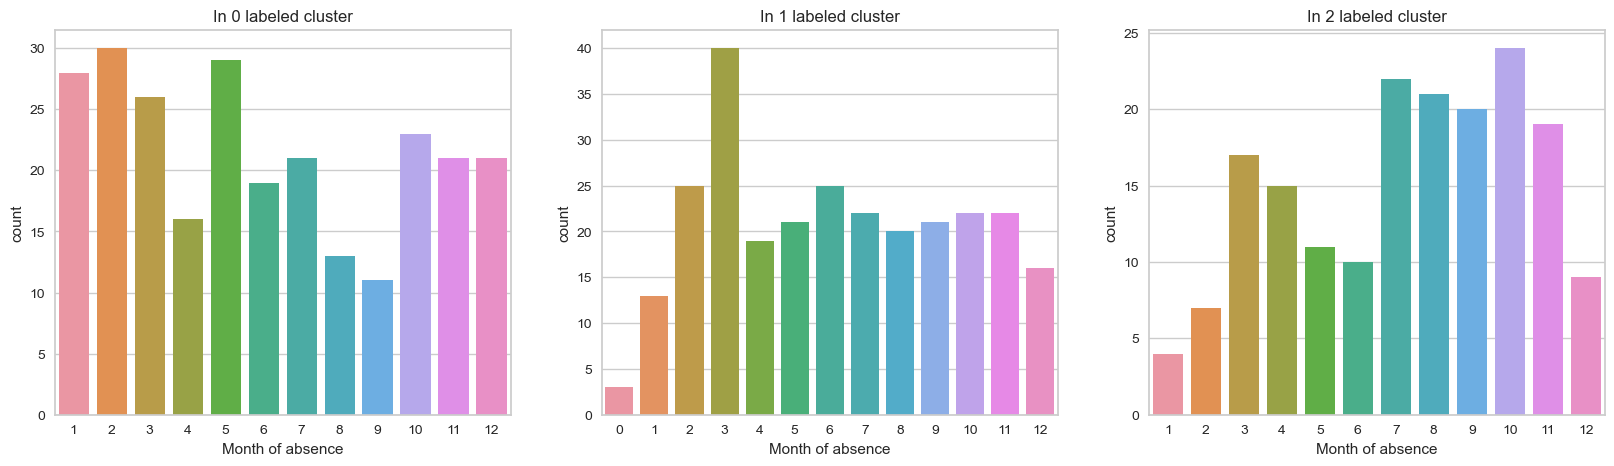

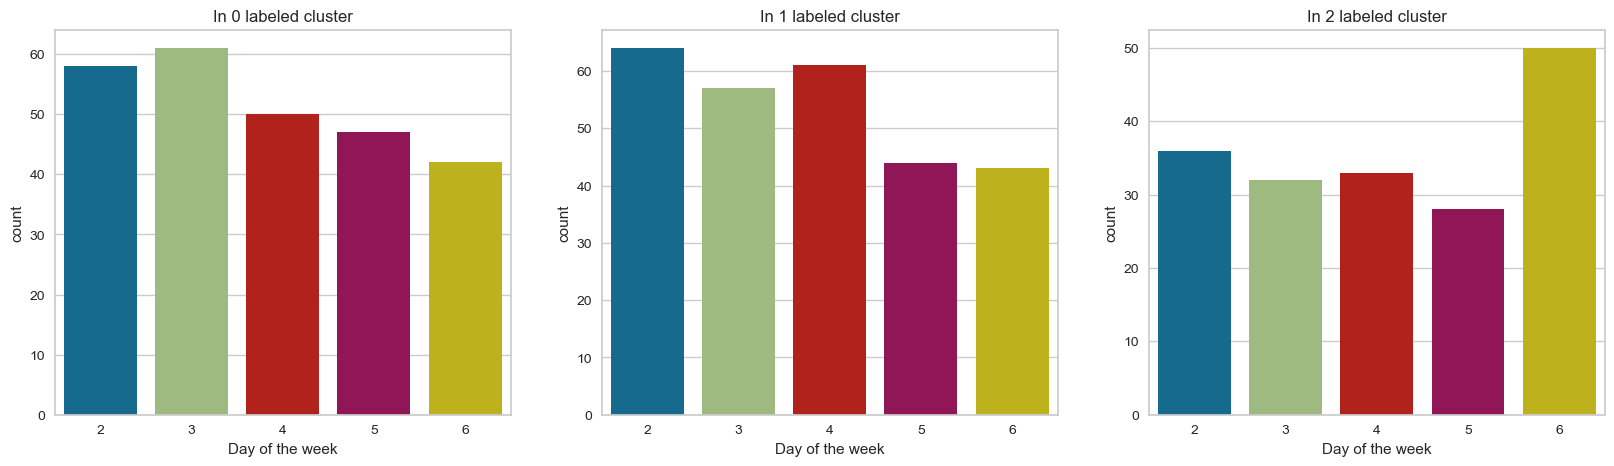

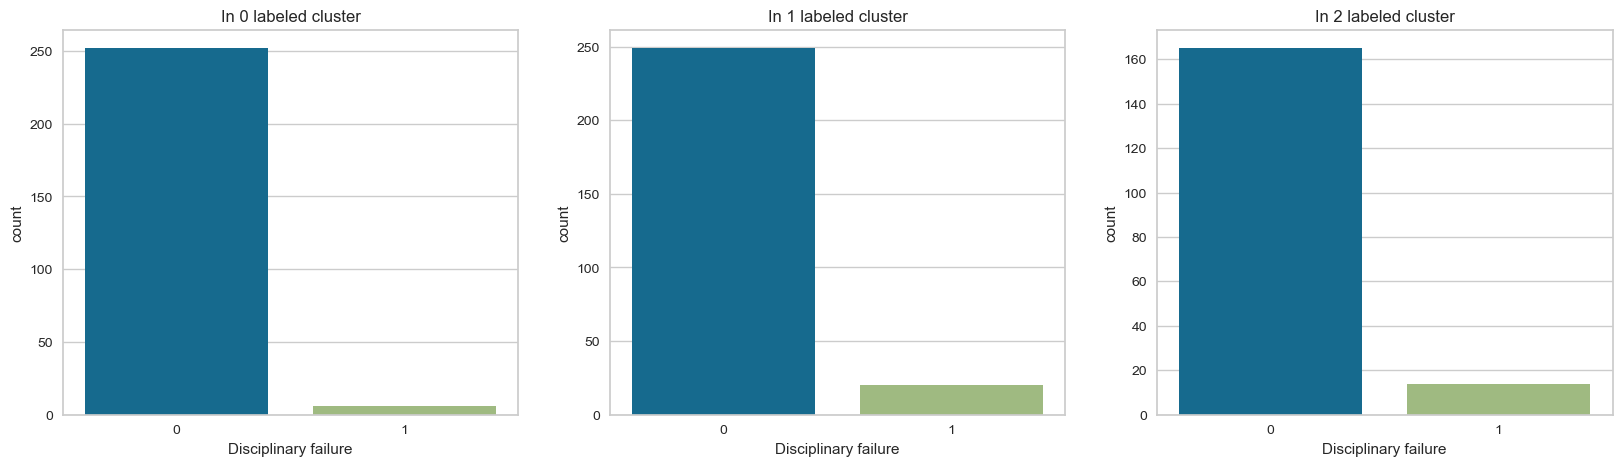

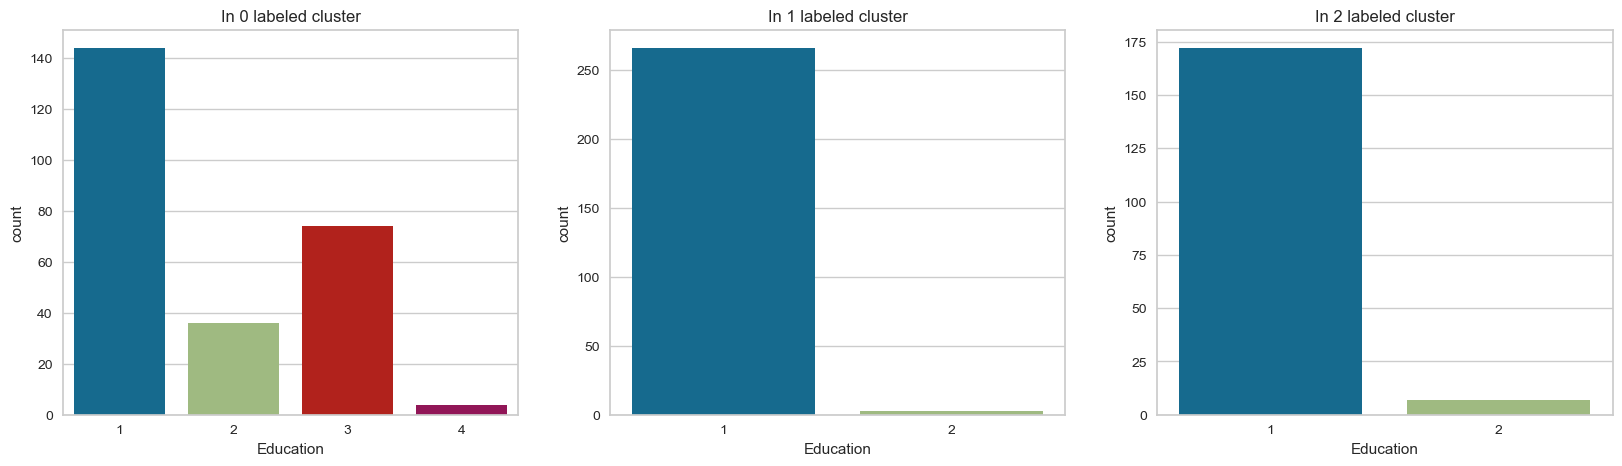

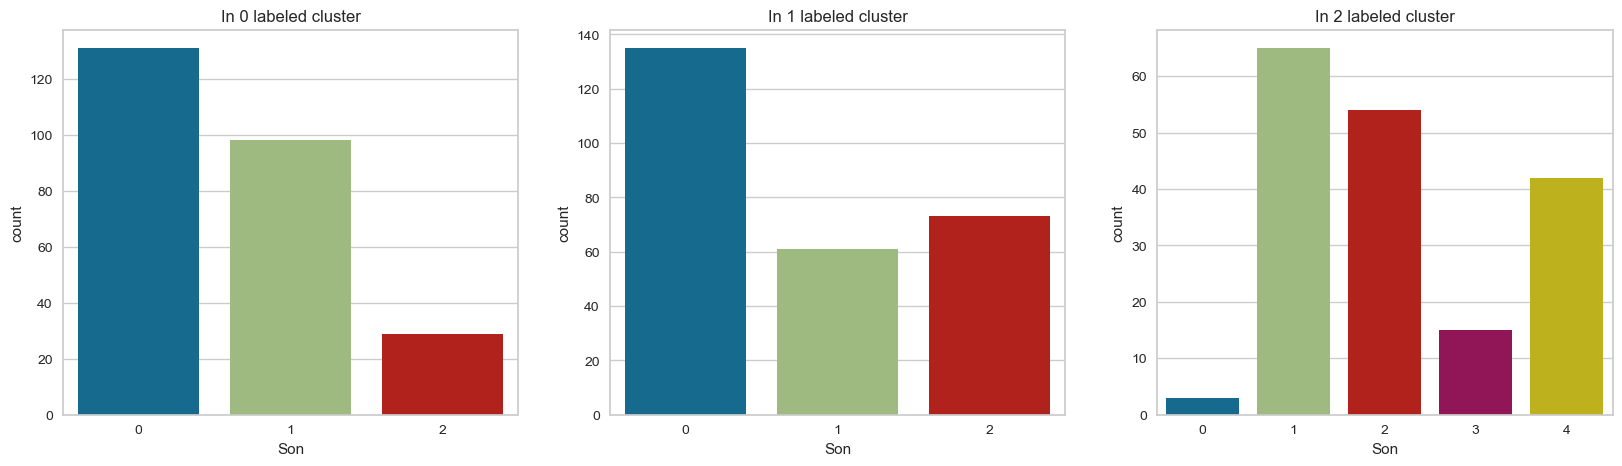

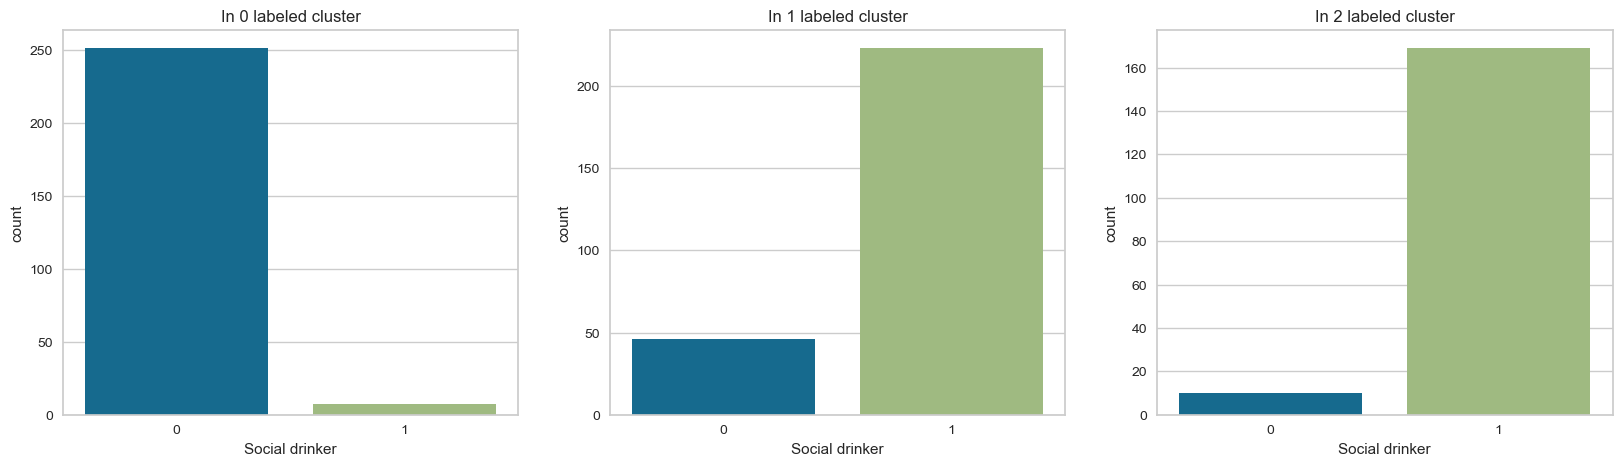

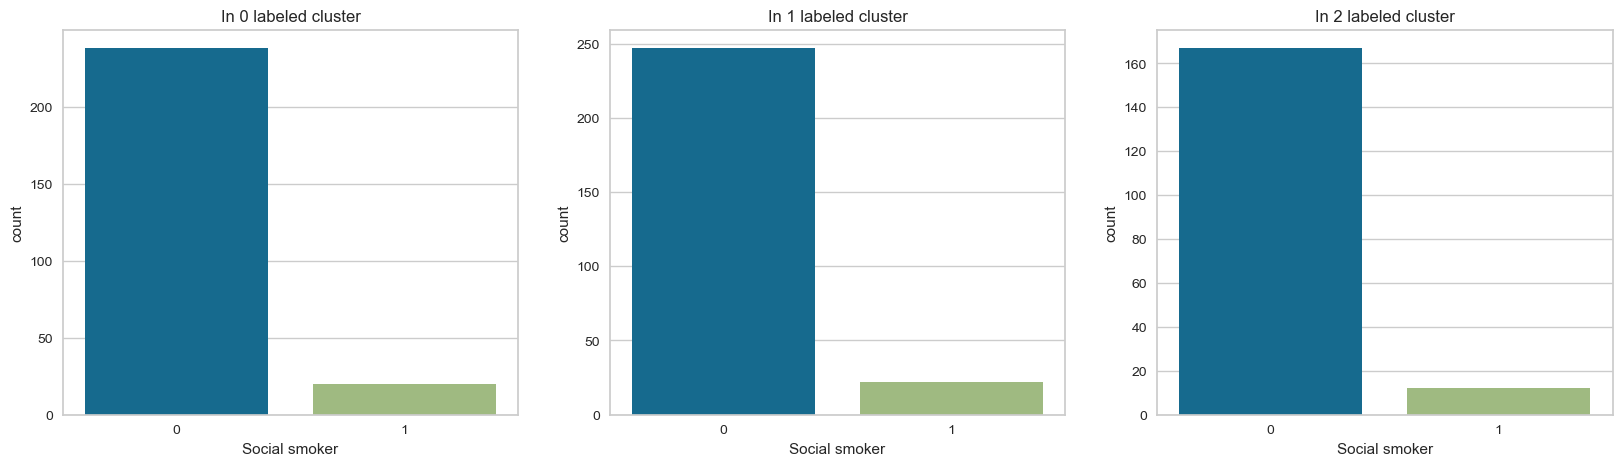

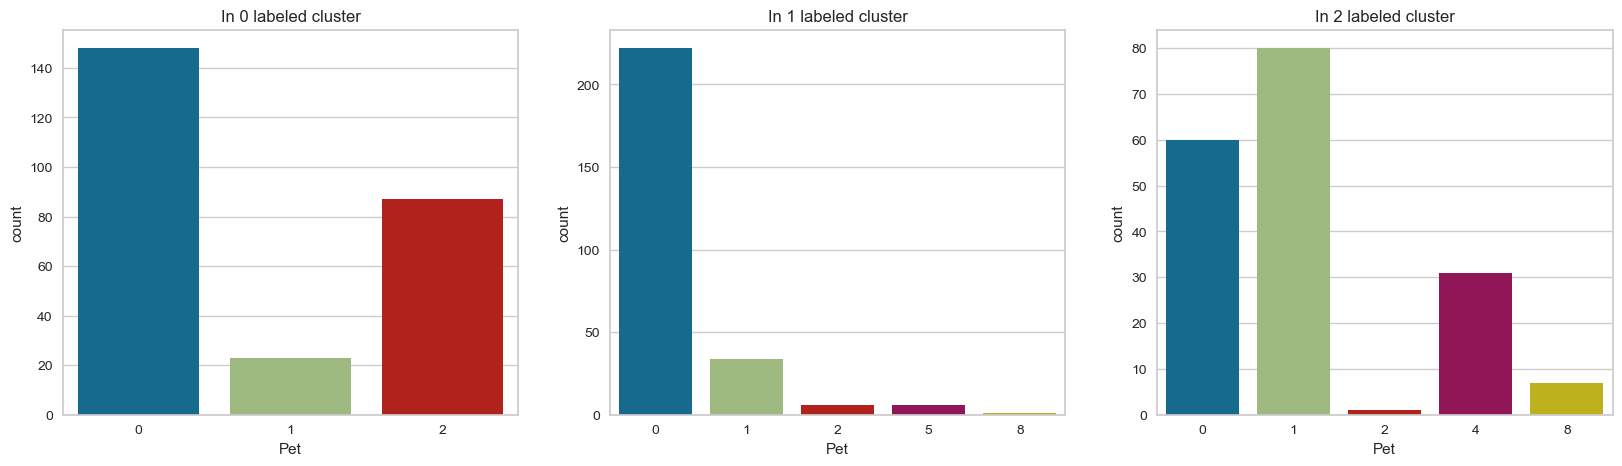

In [613]:
for col in cat_col:
    fig,axs=plt.subplots(1,3,figsize=(20,5))
    axs=axs.ravel()
    j=0
    for i in set(hr_labels):
        sns.countplot(col,data=emp_data[emp_data["clusters"]==i],ax=axs[j])
        axs[0].set_title("In 0 labeled cluster")
        axs[1].set_title("In 1 labeled cluster")
        axs[2].set_title("In 2 labeled cluster")
        j+=1
    plt.show()
    

1. cluster 2 do not contain 0 number of son, cluster 0 and 1 do not contain employees who have more than 2 sons.
2. Social drinkers are only in cluster 1 & 2
3. cluster 0 do not contain much number of pet,cluster 1 contains employees who have no pets
4. cluster 1 contains different number of pets
5. cluster 1 and 2 contains education category 1 only

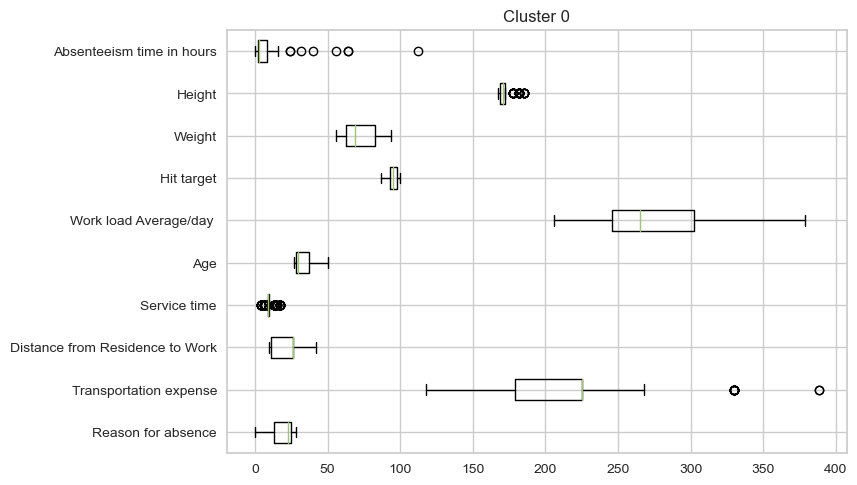

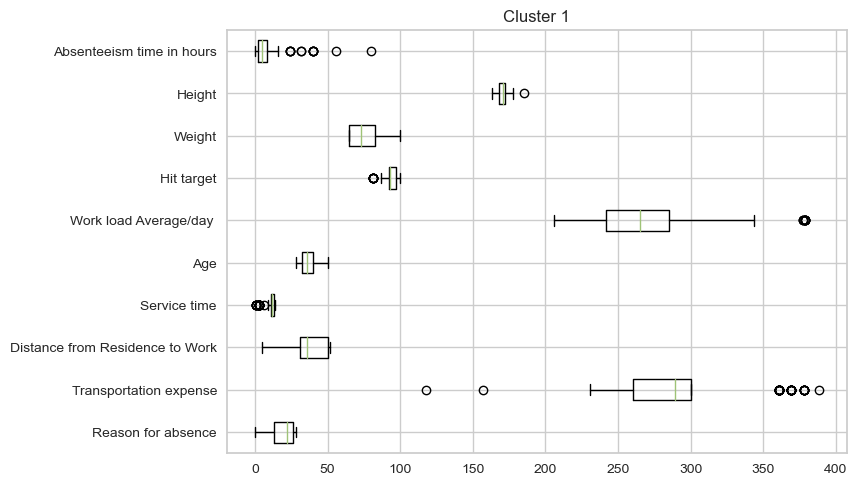

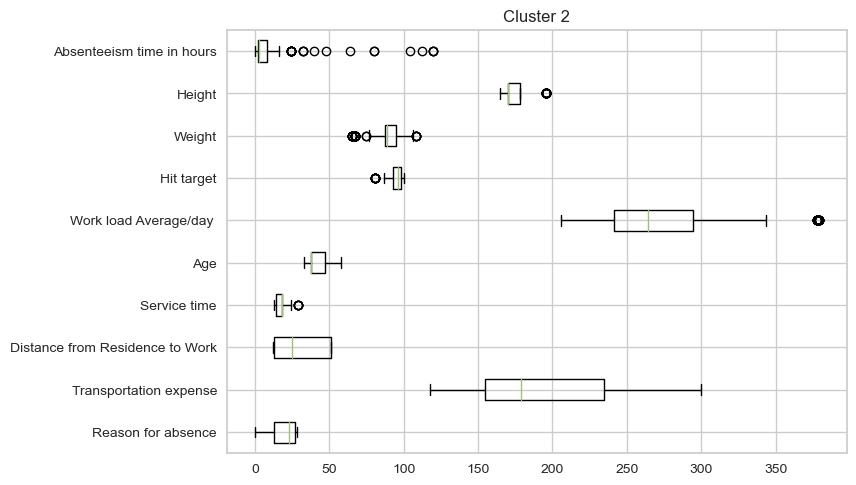

In [559]:
for i in set(k_labels):
    plt.boxplot(emp_data[cont_col][emp_data["clusters"]==i],labels=cont_col,vert=False)
    plt.title(f"Cluster {i}")
    plt.show()

1. weight is high in cluster 2.
2. overload is less in cluster 2.
3. cluster 3 containing higher ages.
4. distance is less in cluster 0, high in cluster 1 and well distributed in cluster 2.
5. transportation expense is higher in cluster 1 ,less in cluster 0 and well distributed in cluster 2.